In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Завдання 1

Завантаження датасету

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Роздрукування 10 зображень

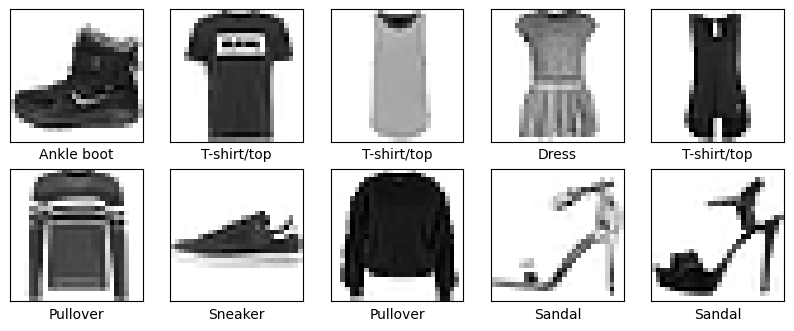

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Підготовка даних і побудова архітектури

In [4]:

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Використання ранньої зупинки і зменшення швидкості

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(train_images, train_labels, epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7668 - loss: 0.6679 - val_accuracy: 0.8567 - val_loss: 0.4043 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8577 - loss: 0.3970 - val_accuracy: 0.8515 - val_loss: 0.4089 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8740 - loss: 0.3450 - val_accuracy: 0.8696 - val_loss: 0.3611 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8817 - loss: 0.3214 - val_accuracy: 0.8785 - val_loss: 0.3413 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8887 - loss: 0.3074 - val_accuracy: 0.8737 - val_loss: 0.3507 - learning_rate: 0.0010
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8954 - loss: 0.2832 - val_accuracy: 0.8827 - val_loss: 0.3267 - learning_rate: 0.0010
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9020 - 

Виведення архітектури моделі

In [6]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Збереження моделі на Google Drive

In [7]:
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Побудова графіків функції втрат і точності

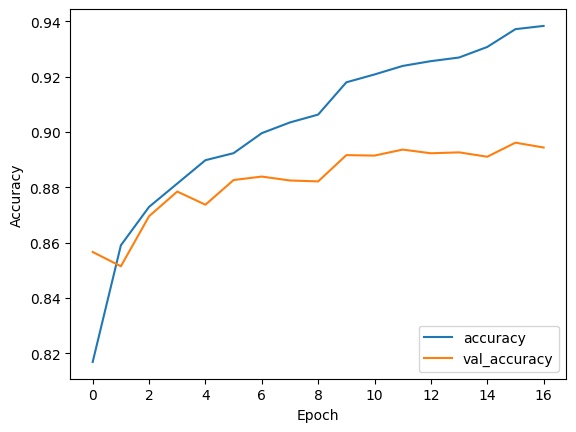

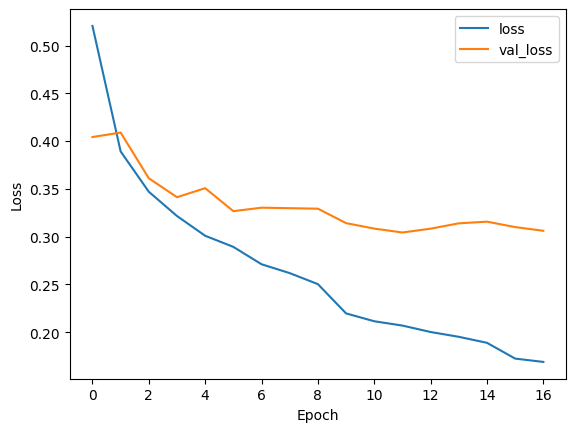

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Виведення класифікаційного звіту

In [9]:
import numpy as np

test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)


predicted_classes = [class_names[np.argmax(pred)] for pred in predictions]
true_classes = [class_names[label] for label in test_labels]
print(classification_report(test_labels, [np.argmax(pred) for pred in predictions], target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.3250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.81      0.80      1000
       Dress       0.93      0.86      0.90      1000
        Coat       0.78      0.85      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.74      0.67      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Виведення прогнозованого і справжнього класу

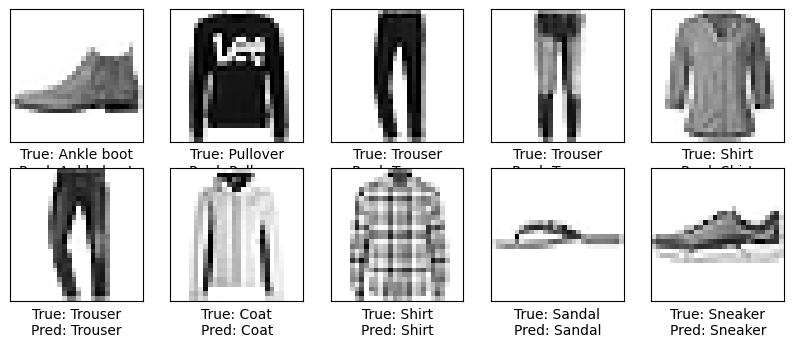

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}")
plt.show()

Завдання 2

In [11]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.3 MB/s eta 0:00:00


In [12]:

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers, Input
import keras_tuner as kt
import tensorflow as tf

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Вибір кількості нейронів у прихованих шарах
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Вибір оптимізатора
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Ініціалізація тюнера
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=2)

# Підбір гіперпараметрів
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

# Отримання найкращої моделі
best_model = tuner.get_best_models(1)[0]
best_model.summary()


Trial 2 Complete [00h 01m 04s]
val_accuracy: 0.8761666417121887

Best val_accuracy So Far: 0.8761666417121887
Total elapsed time: 00h 02m 32s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 288)                 │         226,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,714 (924.66 KB)

 Trainable params: 236,714 (924.66 KB)

 Non-trainable params: 0 (0.00 B)

Висновок: Модель з Keras Tuner (Завдання 2) є більш оптимальною, оскільки має менше параметрів (потребує значно менше тренувальних даних для навчання), при цьому забезпечуючи високу точність на валідаційному наборі (87.27%). Це вказує на те, що простіша модель з меншою кількістю нейронів може бути більш ефективною для задачі класифікації зображень з датасету Fashion MNIST.